In [44]:

layer = 8
gpu_index = 0

sparsity_levels = [0.005,0.0005,0.00005,0.000005,0]
lamb = 0.0

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import numpy as np
import os
device = torch.device("cuda:"+str(gpu_index))

class SAE(nn.Module):
    def __init__(self):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(4096,int(8*4096),bias=True) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(int(8*4096), 4096,bias=True) 
        self.initialize_weights()
    #Biases are initialized to zero, 
    def initialize_weights(self):
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)
        #fun trick, gaussians in high dimensions are uniform "soap bubbles"
        W_d = torch.randn(self.fc2.weight.size())
        W_d = W_d / W_d.norm(dim=1, keepdim=True) * 0.1  # Adjust 0.1 as needed
        self.fc2.weight.data = W_d
        self.fc1.weight.data = W_d.t()
    def forward(self, x):
        features = self.relu1(self.fc1(x))
        x_hat = self.fc2(features)
        return x_hat,features 
sae = SAE()
sae = nn.DataParallel(sae, device_ids=[gpu_index])
sae = sae.cuda(device=gpu_index)
dirr = os.listdir(f"/data/vision/torralba/selfmanaged/torralba/scratch/schwett/meow/SAE_imagetext_layer{layer}_models_longrun/")[0]
sae.load_state_dict(torch.load(f"/data/vision/torralba/selfmanaged/torralba/scratch/schwett/meow/SAE_imagetext_layer{layer}_models_longrun/"+dirr))


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



w = open("class_pairs.txt", 'r').read().splitlines() 
steering_vectors = []
classes = os.listdir("steering_vectors")
cls1 = []
cls2 = []
for cls in classes[:2]:
    a = cls.split("_to_")[0]
    b = cls.split("_to_")[1]
    cls1.append(a)
    cls2.append(b)

index = 1
data1 = torch.load(f'image_activations/{cls1[index]}/layer8.pt').cpu().numpy()
data2 = torch.load(f'image_activations/{cls2[index]}/layer8.pt').cpu().numpy()





/tmp/ipykernel_1759403/2397085348.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sae.load_state_dict(torch.load(f"/data/vision/torralba/selfmanaged/torralba/scratch/sc

In [20]:
import torch
import numpy as np

Linear(in_features=32768, out_features=998, bias=True)

In [3]:
lambs = [0.01, 0.00265914795, 0.000707106781, 0.000188030155, 5e-05]

In [18]:
l0s_2 = []
cos_sim_2 = []
for lamb in lambs:
    l0s_2.extend(np.load(f"steering_approx/random/lambda_{lamb}_reconstruction_l0s.npy"))
    cos_sim_2.extend(np.load(f"steering_approx/random/lambda_{lamb}_reconstruction_dots.npy"))
    

In [ ]:
l0s_2 = []
cos_sim_2 = []
for lamb in lambs:
    l0s_2.extend(np.load(f"steering_approx/random/lambda_{lamb}_reconstruction_l0s.npy"))
    cos_sim_2.extend(np.load(f"steering_approx/random/lambda_{lamb}_reconstruction_dots.npy"))
    

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

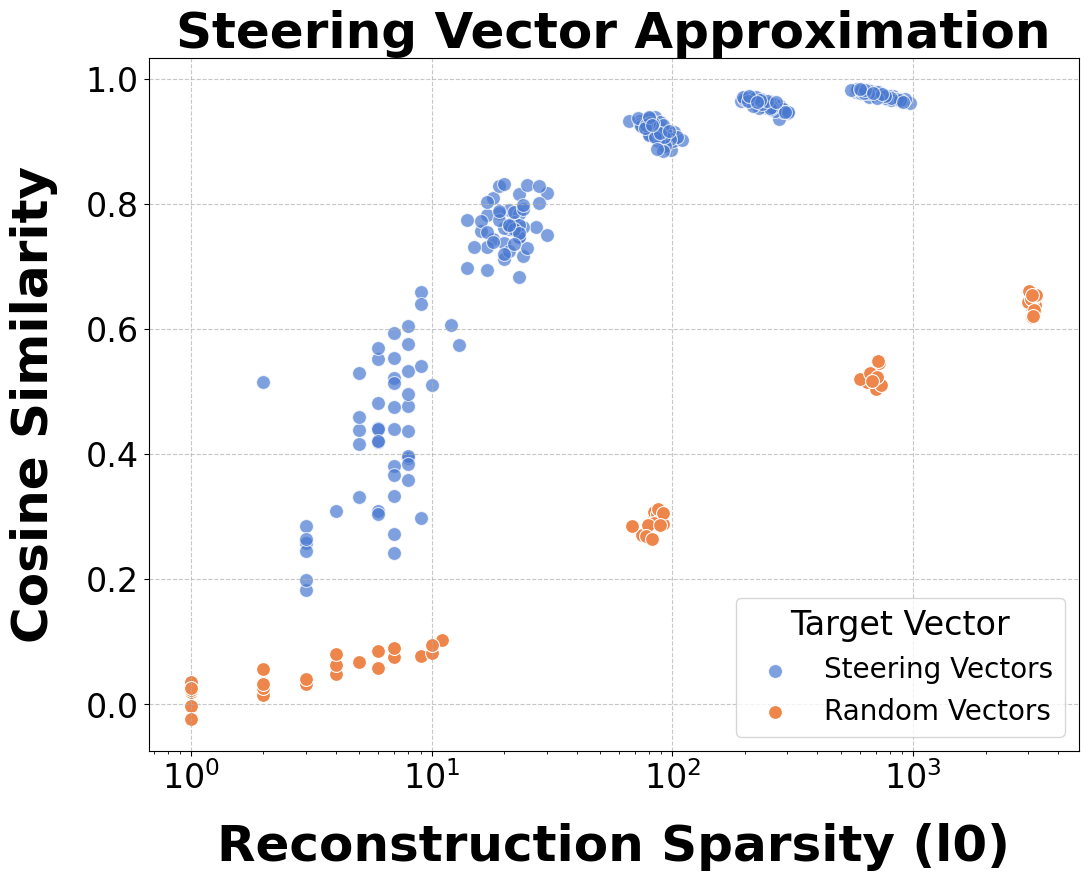

In [23]:
colors = [
    sns.color_palette("muted", 7)[0],
    sns.color_palette("muted", 7)[1],
]

# Plot
plt.figure(figsize=(12, 9))
ax = sns.scatterplot(x=l0s,y=cos_sim,label='Steering Vectors',color=colors[0],s=100,alpha = 0.7)
sns.scatterplot(x=l0s_2,y=cos_sim_2,label='Random Vectors',color=colors[1],s=100)

# Styling
plt.title("Steering Vector Approximation", fontsize=36, fontweight='bold')
plt.xlabel("Reconstruction Sparsity (l0)", fontsize=36, fontweight='bold', labelpad=20)
plt.ylabel("Cosine Similarity", fontsize=36, fontweight='bold', labelpad=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=20, title="Target Vector", title_fontsize=24)
plt.grid(axis='both', linestyle='--', alpha=0.7)
ax.set_xscale('log')
# Display the plot
plt.savefig('snuggle.png', dpi=1000, bbox_inches='tight')
plt.show()


In [4]:
import torch
import numpy as np

In [6]:
layer=8
gpu_index=0
import torch.nn as nn

In [7]:
class SAE(nn.Module):
    def __init__(self):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(4096,int(8*4096),bias=True) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(int(8*4096), 4096,bias=True) 
        self.initialize_weights()
    #Biases are initialized to zero, 
    def initialize_weights(self):
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)
        #fun trick, gaussians in high dimensions are uniform "soap bubbles"
        W_d = torch.randn(self.fc2.weight.size())
        W_d = W_d / W_d.norm(dim=1, keepdim=True) * 0.1  # Adjust 0.1 as needed
        self.fc2.weight.data = W_d
        self.fc1.weight.data = W_d.t()
    def forward(self, x):
        features = self.relu1(self.fc1(x))
        x_hat = self.fc2(features)
        return x_hat,features 
sae = SAE()
sae = nn.DataParallel(sae, device_ids=[gpu_index])
sae = sae.cuda(device=gpu_index)
dirr = os.listdir(f"/data/vision/torralba/selfmanaged/torralba/scratch/schwett/meow//SAE_imagetext_layer{layer}_models_longrun/")[0]
sae.load_state_dict(torch.load(f"/data/vision/torralba/selfmanaged/torralba/scratch/schwett/meow//SAE_imagetext_layer{layer}_models_longrun/"+dirr))


/tmp/ipykernel_2322646/1815227225.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sae.load_state_dict(torch.load(f"/data/vision/torralba/selfmanaged/torralba/scratch/sc

<All keys matched successfully>

In [2]:
import torch
import torch.nn as nn
class SimpleLinear(nn.Module):
    self.linear = nn.Linear(,998)

SyntaxError: invalid syntax (3494575283.py, line 4)

In [1]:
import os

In [8]:
lis = os.listdir('image_activations')
embeddings_list = [torch.load(f"image_activations/{x}/layer8.pt").detach().cpu() for x in lis]

/tmp/ipykernel_2322646/1009705664.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_list = [torch.load(f"image_activations/{x}/layer8.pt").detach().cpu() for x 

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------
# 1) Suppose you already have 998 tensors, each of shape (500, 4096).
#    We'll call them: embeddings_list = [emb_0, emb_1, ..., emb_997].
#    For demonstration, let's just create random data here.
# ---------------------------------------------------------
num_classes = 998
samples_per_class = 500
embedding_dim = 4096*8

# ---------------------------------------------------------
# 2) Create a single dataset (X, y).
#    - X shape: (998 * 500, 4096)
#    - y shape: (998 * 500,)
# ---------------------------------------------------------
all_data = torch.cat(embeddings_list, dim=0)  # shape: (998*500, 4096)

all_labels_list = []
for class_idx, emb in enumerate(embeddings_list):
    # Label tensor of shape (500,) all filled with class_idx
    labels = torch.full((emb.shape[0],), class_idx, dtype=torch.long)
    all_labels_list.append(labels)

all_labels = torch.cat(all_labels_list, dim=0)  # shape: (998*500,)

# ---------------------------------------------------------
# 3) Shuffle the dataset
# ---------------------------------------------------------
num_samples = all_data.size(0)
indices = torch.randperm(num_samples)
all_data = all_data[indices]
all_labels = all_labels[indices]
reciptemp=1.5
lamb=1e-7
# ---------------------------------------------------------
# 4) Split into train/test sets
# ---------------------------------------------------------
train_ratio = 0.8
train_size = int(num_samples * train_ratio)

train_data = all_data[:train_size]
train_labels = all_labels[:train_size]

test_data = all_data[train_size:]
test_labels = all_labels[train_size:]

# ---------------------------------------------------------
# 5) Wrap into DataLoaders
# ---------------------------------------------------------
batch_size = 2048

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ---------------------------------------------------------
# 6) Define a linear classifier
# ---------------------------------------------------------
model = nn.Linear(embedding_dim, num_classes)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Use NLLLoss with log_softmax
mask = torch.zeros((4096*8,998), requires_grad=True,device=device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(list(model.parameters())+[mask], lr=4e-3)

# ---------------------------------------------------------
# 7) Training loop
# ---------------------------------------------------------
epochs = 25

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        
        # Get logits from the model
        saed = sae(X_batch)[1]
        u = torch.clip(torch.rand((4096*8,998),device=device, requires_grad=True),0.0001,0.9999)
        s = torch.sigmoid(reciptemp*((u/(1-u)).log() + mask))
        z = torch.clip(s*(1.2)-0.1,0,1)
        
        outputs = torch.matmul(saed,model.weight.data.T*z) # shape: (batch_size, num_classes)
        
        # Convert to log probabilities
        log_probs = F.log_softmax(outputs, dim=1)  # shape: (batch_size, num_classes)
        
        # Compute NLL loss
        loss = criterion(log_probs, y_batch)+ lamb*torch.sum(torch.sigmoid(mask-np.log(0.1 / 1.1)/reciptemp))
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
u = torch.clip(torch.rand((4096*8,998),device=device, requires_grad=True),0.0001,0.9999)
s = torch.sigmoid(reciptemp*((u/(1-u)).log() + mask))
z = torch.clip(s*(1.2)-0.1,0,1)
model.weight.data *= z.T
# ---------------------------------------------------------
# 8) Evaluation (top-1 and top-5)
# ---------------------------------------------------------
model.eval()
correct_top1 = 0
correct_top5 = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Get raw logits from the model
        outputs = model(sae(X_batch)[1])  # (batch_size, num_classes)
        # Convert logits to probabilities via softmax
        probs = F.softmax(outputs, dim=1)  # shape: (batch_size, num_classes)
        
        # Top-1 accuracy
        _, pred_top1 = probs.max(dim=1)
        correct_top1 += pred_top1.eq(y_batch).sum().item()
        
        # Top-5 accuracy
        _, top5_indices = probs.topk(5, dim=1)
        # Check if the true label is among the top-5 predictions
        correct_in_top5 = torch.any(top5_indices.eq(y_batch.view(-1, 1)), dim=1)
        correct_top5 += correct_in_top5.sum().item()
        
        total += y_batch.size(0)

top1_acc = correct_top1 / total
top5_acc = correct_top5 / total
print(f"Sparsity (l0): {z.sum().item()}")
print(f"Test Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Test Top-5 Accuracy: {top5_acc * 100:.2f}%")


Epoch [1/25], Loss: 9.5043
Epoch [2/25], Loss: 9.1689
Epoch [3/25], Loss: 8.7045
Epoch [4/25], Loss: 8.2139
Epoch [5/25], Loss: 7.8220
Epoch [6/25], Loss: 7.5572
Epoch [7/25], Loss: 7.3860
Epoch [8/25], Loss: 7.2735
Epoch [9/25], Loss: 7.1967
Epoch [10/25], Loss: 7.1421
Epoch [11/25], Loss: 7.1020
Epoch [12/25], Loss: 7.0717
Epoch [13/25], Loss: 7.0481
Epoch [14/25], Loss: 7.0294
Epoch [15/25], Loss: 7.0143
Epoch [16/25], Loss: 7.0020
Epoch [17/25], Loss: 6.9917
Epoch [18/25], Loss: 6.9830
Epoch [19/25], Loss: 6.9757
Epoch [20/25], Loss: 6.9694
Epoch [21/25], Loss: 6.9640
Epoch [22/25], Loss: 6.9592
Epoch [23/25], Loss: 6.9551
Epoch [24/25], Loss: 6.9514
Epoch [25/25], Loss: 6.9482
Sparsity (l0): 112961.046875
Test Top-1 Accuracy: 0.10%
Test Top-5 Accuracy: 0.57%


In [23]:
np.linspace(0,30,20)

array([ 0.        ,  1.57894737,  3.15789474,  4.73684211,  6.31578947,
        7.89473684,  9.47368421, 11.05263158, 12.63157895, 14.21052632,
       15.78947368, 17.36842105, 18.94736842, 20.52631579, 22.10526316,
       23.68421053, 25.26315789, 26.84210526, 28.42105263, 30.        ])

NameError: name 'group_labels' is not defined

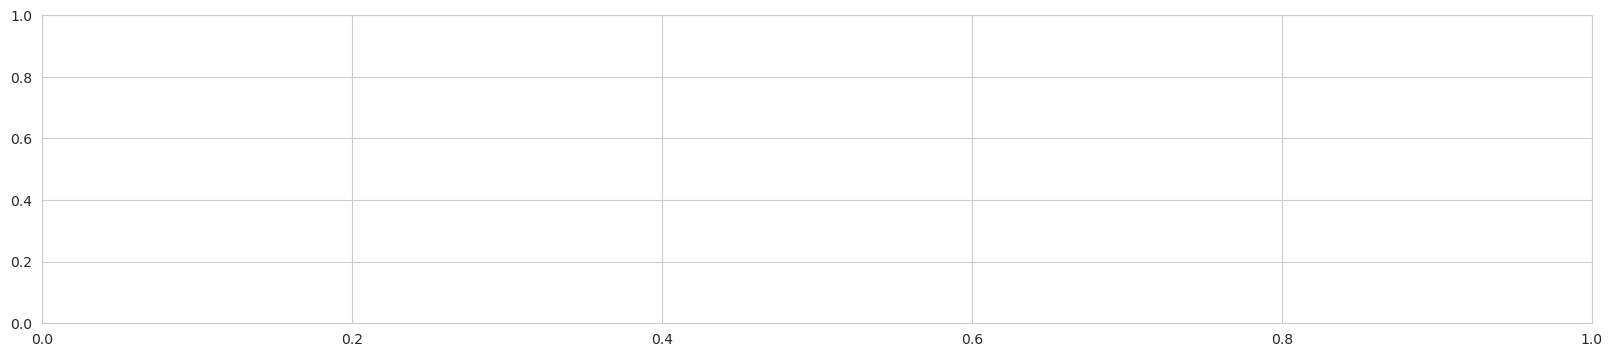

In [154]:
# Adjust the plot to make it slightly thinner in height
fig, ax = plt.subplots(figsize=(20, 4))  # Slightly thinner figure

# Thinner bar width with gaps
thin_width = 0.08

# Plot each category's data for the groups
for i, category in enumerate(categories):
    category_values = [new_data[group][i] for group in group_labels]
    ax.bar(x + i * thin_width - (len(categories) - 1) * thin_width / 2, category_values, thin_width, 
           label=category, color=custom_colors[i % len(custom_colors)], edgecolor='black')

# Add annotations on the bars with small font size and bold text
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Styling the plot
ax.set_title("Performance Across Tasks", fontsize=16, fontweight='bold')
ax.set_ylabel("Performance (%)", fontsize=12)
ax.set_xlabel("Tasks", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(group_labels, fontsize=10)
ax.legend(fontsize=10, title="Categories")
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(20, 90)

# Display the plot
plt.tight_layout()
plt.show()


In [132]:
base_imagenet = '/data/vision/torralba/datasets/imagenet_pytorch_new'
labels_path = f'{base_imagenet}/imagenet_class_index.json'
with open(labels_path, 'r') as f:
    imagenet_labels = json.load(f)

imagenet_labels = pd.DataFrame(imagenet_labels).T.rename(columns=({0: 'id', 1: 'label'}))

In [134]:
len(imagenet_labels)

1000

In [94]:
cls2

['radio', 'tank']

In [81]:
torch.mean(torch.nn.functional.cosine_similarity(torch.tensor(data1),torch.tensor(data2),dim=0))

tensor(0.6215)

In [124]:
import json
base_imagenet = '/data/vision/torralba/datasets/imagenet_pytorch_new'
labels_path = f'{base_imagenet}/imagenet_class_index.json'
with open(labels_path, 'r') as f:
    imagenet_labels = json.load(f)

imagenet_labels = pd.DataFrame(imagenet_labels).T.rename(columns=({0: 'id', 1: 'label'}))

array(['tench', 'goldfish', 'great_white_shark', 'tiger_shark',
       'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich',
       'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting',
       'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel',
       'kite', 'bald_eagle', 'vulture', 'great_grey_owl',
       'European_fire_salamander', 'common_newt', 'eft',
       'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog',
       'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle',
       'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana',
       'American_chameleon', 'whiptail', 'agama', 'frilled_lizard',
       'alligator_lizard', 'Gila_monster', 'green_lizard',
       'African_chameleon', 'Komodo_dragon', 'African_crocodile',
       'American_alligator', 'triceratops', 'thunder_snake',
       'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake',
       'garter_snake', 'water_snake', 'vine_snake', 'night_snake',
     

In [96]:
a=sae(torch.tensor(data1).to(device)-torch.tensor(data2).to(device))[1]

In [ ]:
data1-d

In [91]:
torch.unique(torch.nonzero(a)[:,1])

tensor([ 4239, 31744], device='cuda:0')

In [92]:
torch.unique(torch.nonzero(b)[:,1])

tensor([ 4239, 31744], device='cuda:0')

In [76]:
torch.nonzero(b)

tensor([[    0,  4239],
        [    1,  4239],
        [    1, 31744],
        ...,
        [  497,  4239],
        [  498,  4239],
        [  499,  4239]], device='cuda:0')

In [45]:
data1.shape

(500, 4096)

In [36]:
torch.mean((sae(data1.to(device))[0]-data1)**2)/torch.mean((data1**2))

tensor(2.6710, device='cuda:0', grad_fn=<DivBackward0>)

In [46]:
negative_labels = np.zeros((500, 1))
positive_labels = np.ones((500, 1))

X = np.vstack((data1, data2))
y = np.vstack((negative_labels, positive_labels))

X = torch.tensor(X, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
        

In [49]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_dim):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
    
input_dim = X_train.shape[1]
linear_model = SimpleLinearModel(input_dim).to(device)
reciptemp =1.5
mask = torch.zeros(4096, requires_grad=True,device=device)
criterion = nn.BCELoss()
optimizer = optim.Adam(list(linear_model.parameters())+[mask], lr=0.001)

num_epochs = 1000
batch_size = 32
pbar = tqdm(range(num_epochs))
for epoch in pbar:
    permutation = torch.randperm(X_train.size()[0])

    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]
        u = torch.clip(torch.rand(4096,device=device, requires_grad=True),0.0001,0.9999)
        s = torch.sigmoid(reciptemp*((u/(1-u)).log() + mask))
        z = torch.clip(s*(1.2)-0.1,0,1)
        # Forward pass
        batch_x = batch_x*z
        outputs = linear_model(batch_x)
        loss = criterion(outputs, batch_y) #+ lamb*torch.sum(torch.sigmoid(mask-np.log(0.1 / 1.1)/reciptemp))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.set_description(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

u = torch.clip(torch.rand(4096*8,device=device, requires_grad=True),0.0001,0.9999)
s = torch.sigmoid(reciptemp*((u/(1-u)).log() + mask))
z = 1.0*(torch.clip(s*(1.2)-0.1,0,1)>0.5).unsqueeze(0)
linear_model.linear.weight.data *= z


with torch.no_grad():
    y_pred = linear_model(X_test)
    y_pred = torch.round(y_pred)
    accuracy = accuracy_score(y_test.cpu(), y_pred.cpu())  # Move to CPU for accuracy calculation
    print(f"Test accuracy on : {accuracy:.4f}")
#TODO: save model
#torch.save(linear_model.state_dict(), 'probes/lambda_'+str(gpu_index)+'/'+classes[index]+'_linear_classifier.pt')

Epoch [939/1000], Loss: 0.0000:  94%|███████▌| 938/1000 [03:05<00:12,  5.05it/s]


KeyboardInterrupt: 

In [15]:
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [97]:
import pandas as pd

In [108]:
df = pd.read_csv("Processed_Dataset_with_Distractors.csv")

In [106]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None) 

In [109]:
df.head()

,questions,answers,og_class,target_class,coherence_score,steering_score,distractor1,distractor2
0,In what environment or setting would you most ...,...,ox,castle,0.00,0.0,screen,stove
1,Describe this image in detail.,1. The image is a black and white photograph....,prison,dough,0.75,0.0,printer,cricket
2,Is this image related in any way to the concep...,...,notebook,ski,0.00,0.0,desk,chest
3,Describe the primary purpose or function of th...,...,throne,torch,0.00,0.0,rule,iron
4,How large is the main subject of this image ty...,\n\nQuestion: How large is the main subject o...,stove,fig,1.00,0.0,pole,candle


8316

In [122]:
print(len(df[df['steering_score']==1.0]))
print(len(df[df['steering_score']==0.75]))
print(len(df[df['steering_score']==0.5]))
print(len(df[df['steering_score']==0.25]))
print(len(df[df['steering_score']==0.0]))

15739
361
877
487
20493


1657

2020

15253